In [1]:
import requests
def get_claude_completion(prompt):
    url = 'https://runway.devops.rednote.life/openai/bedrock_runtime/model/invoke'
    headers = {
        'token': 'd32974a62c3d471da311064046166621',
        'Content-Type': 'application/json'
    }
    data = {
        "anthropic_version": "bedrock-2023-05-31", 
        "max_tokens": 4096,
        "messages": [
            {
                "role": "user",
                "content": [
                    {
                        "type": "text",
                        "text": prompt
                    }
                ]
            }
        ]
    }
    
    response = requests.post(url, headers=headers, json=data)
    return response.json()['content'][0]['text']

In [3]:
DIVIDE_SP_1 = """You are given a complex and information-rich instruction. Your task is to decompose this instruction into:
1. One **core instruction** that captures the essence and overall goal of the original instruction.  
2. Several **supplementary instructions** that elaborate on or add details to the core instruction. These supplementary instructions must be strongly related to and dependent on the core instruction — they should not function as independent tasks.

The goal is **not** to split the complex instruction into multiple independent tasks, but to extract a structured representation where **one core instruction summarizes the main task**, and each supplementary instruction provides additional, context-specific clarifications, constraints, or elaborations that support the core instruction.

Ensure that:  
- The **core instruction** stands as a concise and accurate abstraction of the full intent.  
- Each **supplementary instruction** refines or extends the core instruction without diverging into a separate goal.

Use clear and precise language. Do not omit any key information from the original instruction — ensure all content is preserved through the combination of the core and supplementary instructions.

**Example Input**:
"Write a Python script that reads a CSV file containing user information, filters out users under the age of 18, sorts the remaining users by their registration date in descending order, and then saves the result to a new CSV file with UTF-8 encoding."

**Example Output**:
Core Instruction: Write a Python script to process user data from a CSV file.

Supplementary Instructions:
1. Filter out users who are under the age of 18.
2. Sort the remaining users by registration date in descending order.
3. Save the processed data to a new CSV file using UTF-8 encoding.

**Output Format** (strictly follow this Python dictionary format):

{{
    "Core Instruction": <insert core instruction here>,
    "Supplementary Instructions": [<first supplementary instruction>, <second supplementary instruction>, ...]
}}

Now process this instruction as input:
{prompt}
"""

prompt = DIVIDE_SP_1.format(prompt="Given an integer n, an alternating permutation is a permutation of the first n positive integers such that no two adjacent elements are both odd or both even.\nReturn all such alternating permutations sorted in lexicographical order.\n \nExample 1:\n\nInput: n = 4\nOutput: [[1,2,3,4],[1,4,3,2],[2,1,4,3],[2,3,4,1],[3,2,1,4],[3,4,1,2],[4,1,2,3],[4,3,2,1]]\n\nExample 2:\n\nInput: n = 2\nOutput: [[1,2],[2,1]]\n\nExample 3:\n\nInput: n = 3\nOutput: [[1,2,3],[3,2,1]]\n\n \nConstraints:\n\n1 <= n <= 10\n\n")

In [ ]:
get_claude_completion(prompt)

In [ ]:
import json
import numpy as np
with open('/cpfs/user/zhengziwei/workspace/agent/VeRL-Agent/data/collab_code/LeetCodeDataset-v0.3.0-train-claude.jsonl', 'r') as f:
    supp = [json.loads(line.strip())['collab_divide']['Supplementary Instructions'] for line in f.readlines()]
len(supp)

In [ ]:
num_supp = [len(s) for s in supp]
np.min(num_supp), np.max(num_supp), np.mean(num_supp)

In [ ]:
from verl.workers.agent.envs.collab_code.code import code_exec, extract_code_from_string

PY_IMPORTS = "import heapq\nfrom math import floor, gcd\nimport random\nimport sys\nfrom typing import *\nfrom functools import *\nimport collections\nfrom collections import *\nfrom itertools import *\nfrom heapq import *\nfrom bisect import *\nfrom string import *\nimport math\nimport datetime\ninf = float('inf')\n"

response = 

succ, output = code_exec(solution_code + "\n" + ground_truth["functional"])

In [ ]:
import re

def replace_between_question_and_format(text):
    pattern = r"(### Question:\n)(.*?)(\n\n\n\n### Format:)"
    replaced_text = re.sub(pattern, r"\1{prompt}\3", text, flags=re.DOTALL)
    return replaced_text

replace_between_question_and_format("You are an expert Python programmer. You will be given a question (problem specification) and will generate a correct Python program that matches the specification and passes all tests.\n\n### Question:\nThere is a 1-indexed 8 x 8 chessboard containing 3 pieces.\nYou are given 6 integers a, b, c, d, e, and f where:\n\n(a, b) denotes the position of the white rook.\n(c, d) denotes the position of the white bishop.\n(e, f) denotes the position of the black queen.\n\nGiven that you can only move the white pieces, return the minimum number of moves required to capture the black queen.\nNote that:\n\nRooks can move any number of squares either vertically or horizontally, but cannot jump over other pieces.\nBishops can move any number of squares diagonally, but cannot jump over other pieces.\nA rook or a bishop can capture the queen if it is located in a square that they can move to.\nThe queen does not move.\n\n \nExample 1:\n\n\nInput: a = 1, b = 1, c = 8, d = 8, e = 2, f = 3\nOutput: 2\nExplanation: We can capture the black queen in two moves by moving the white rook to (1, 3) then to (2, 3).\nIt is impossible to capture the black queen in less than two moves since it is not being attacked by any of the pieces at the beginning.\n\nExample 2:\n\n\nInput: a = 5, b = 3, c = 3, d = 4, e = 5, f = 2\nOutput: 1\nExplanation: We can capture the black queen in a single move by doing one of the following: \n- Move the white rook to (5, 2).\n- Move the white bishop to (5, 2).\n\n \nConstraints:\n\n1 <= a, b, c, d, e, f <= 8\nNo two pieces are on the same square.\n\n\n\n### Format: You will use the following starter code to write the solution to the problem and enclose your code within delimiters.\n```python\nclass Solution:\n    def minMovesToCaptureTheQueen(self, a: int, b: int, c: int, d: int, e: int, f: int) -> int:\n```\n\n### Answer: (use the provided format with backticks)\n").format(prompt='!!!!!')

In [ ]:
import re
def extract_code_content(content):
    pattern = r'```python\n(.*?)\n```'
    matches = re.findall(pattern, content, flags=re.DOTALL)
    return matches

len(extract_code_content('ddd')) == 0

In [14]:
import json
import numpy as np

def get_result(input_file):
    accs, turns, success_turns = [], [], []
    with open(input_file, 'r') as f:
        for line in f:
            data = json.loads(line)
            try:
                success = data['test_success']
            except:
                success = False
            accs.append(success)
            if success:
                success_turns.append(data['turns'])
            turns.append(data['turns'])
    return np.mean(accs), np.mean(turns), np.mean(success_turns)

In [ ]:
for model in ['7b', '32b', '72b']:
    for user in ['low', 'mid', 'high']:
        input_file = f'./data/collab_code/qwen-{model}-instruct/LeetCodeDataset-v0.3.0-test-auto_dialogue-{user}.jsonl'.format(model=model, user=user)
        acc, turn, success_turn = get_result(input_file)
        print(f'Qwen-{model}-instruct with {user}-user || Accuracy: {acc:.2f}, Turns: {turn:.2f}, Success_Turns: {success_turn:.2f}'.format(model=model, user=user, acc=acc, turn=turn, success_turn=success_turn))

In [149]:
import pandas as pd
df = pd.read_parquet('/cpfs/user/honglingyi/DATA/LLM/VL_Agent/parquets/vl_agent_V1_train.parquet')
df = df.to_dict(orient='records')
df[0]

{'data_source': 'vl_agent',
 'prompt': array([{'content': 'The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the final answer.\nYou are provided with function signatures within <tools></tools> XML tags:\n<tools>\n{"type": "function", "function": {"name": "zoom_in", "description": "Zoom in and crop the region of an object in the picture.", "parameters": {"type": "object", "properties": {"object": {"type": "string", "description": "The object to be zoomed, in the format "object1, object2, object3""}}, "required": ["object"]}}}\n</tools>\nFor each function call, return a json object with function name and arguments within <tool_call></tool_call> XML tags:\n<tool_call>\n{"name": <function-name>, "arguments": <args-json-object>}\n</tool_call>\nThe output format of reasoning process and final answer are enclosed within <think> </think> and <answer> </answer> tags, respectively, i.e., "<thi

In [17]:
import pandas as pd
df = pd.read_parquet('/cpfs/user/zhengziwei/workspace/agent/VeRL-Agent/data/vlagent/parquet/train_GQA_1t_fail.parquet')
df = df.to_dict(orient='records')
df[0]

{'data_source': 'vl_agent',
 'env_name': 'vl_agent_v3',
 'prompt': array([{'content': '', 'role': 'system'},
        {'content': '<image>\nQuestion: What is covered in sauce?\nIf the images provided above are not sufficient to answer the user\'s question, please generate grouding results in JSON format:\n```json\n[\n    {"bbox_2d": [x1, y1, x2, y2], "label": "label name"}\n]\n```\nThe zoomed-in images of your grounding results will be provided in next turn.\n\nOtherwise, please put your final answer in <answer> </answer> tags.\n', 'role': 'user'}],
       dtype=object),
 'images': array([{'bytes': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\t\t\x08\n\x0c\x14\r\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c $.\' ",#\x1c\x1c(7),01444\x1f\'9=82<.342\xff\xdb\x00C\x01\t\t\t\x0c\x0b\x0c\x18\r\r\x182!\x1c!22222222222222222222222222222222222222222222222222\xff\xc0\x00\x11\x08\x01N\x01\xf4\x

In [18]:
df[0]['images'].shape

(1,)

In [19]:
def print_info(json_path):
    with open(json_path, "r", encoding="utf-8") as f:
        data = json.load(f)
    info = {'num': 0, 'avg_turn': 0, 'avg_obj': 0}
    for d in data:
        info['num'] += 1
        info['avg_turn'] += len(d['conversations']) // 2
        if 'target_instances' in d.keys():
            info['avg_obj'] += len(d['target_instances'])
        else:
            info['avg_obj'] += 0
    info['avg_turn'] /= info['num']
    info['avg_obj'] /= info['num']
    return info

In [13]:
print_info("data/vlagent/seal_vqa_data/GQA_data.json")

{'num': 50857, 'avg_turn': 1.0, 'avg_obj': 1.2046719232357395}

In [14]:
print_info("data/vlagent/seal_vqa_data/llava_focus_data.json")

{'num': 43255, 'avg_turn': 2.88870650791816, 'avg_obj': 1.7759796555311524}

In [20]:
print_info('data/vlagent/seal_vqa_data/llava_instruct_data.json')

{'num': 80000, 'avg_turn': 2.7666625, 'avg_obj': 0.0}

In [21]:
print_info('data/vlagent/seal_vqa_data/negative_data.json')

{'num': 113645, 'avg_turn': 1.0, 'avg_obj': 0.0}

In [22]:
print_info('data/vlagent/seal_vqa_data/possible_locations_conv_86k.json')

{'num': 86032, 'avg_turn': 1.0, 'avg_obj': 0.0}

In [23]:
print_info('data/vlagent/seal_vqa_data/spatial_relation_data.json')

{'num': 46693, 'avg_turn': 1.3865675797228707, 'avg_obj': 2.0}

In [24]:
print_info('data/vlagent/seal_vqa_data/vaw_attribute_data.json')

{'num': 51178, 'avg_turn': 1.0, 'avg_obj': 1.0}

In [31]:
openai_api_key = "EMPTY"
openai_api_base = "http://10.39.11.28:10000/v1"

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key=openai_api_key,
    base_url=openai_api_base
)

models = client.models.list()
model = models.data[0].id

In [32]:
model

'/cpfs/user/honglingyi/MODEL/Qwen/Qwen2.5-72B-Instruct-AWQ'

In [134]:
query_text = """Question: {question}
If the images provided above are sufficient to answer the user's question, please put your final answer in <answer> </answer> tags. Otherwise generate grouding results in JSON format:
```json
[
    {{"bbox_2d": [x1, y1, x2, y2], "label": "label name"}}
]
```
The zoomed-in images of your grounding results will be provided in next turn.
"""

query_text = """Question: {question}
If the images provided above are not sufficient to answer the user's question, please generate grouding results in JSON format:
```json
[
    {{"bbox_2d": [x1, y1, x2, y2], "label": "label name"}}
]
```
The zoomed-in images of your grounding results will be provided in next turn.

Otherwise, please put your final answer in <answer> </answer> tags.
"""


# query_text = """Question: {question}

# Strictly follow the following instructions to address the question above:
# 1. Please reason step by step, and output your thinking process within <think></think>.
# 2. Generate a series of groundings for the region of interest in the image. The groundings should incorporate the key information required to address the above question.
# 3. A high definition image of the grounding region will be provided in the next turn, giving a clearer and better understanding of the image.

# Grounding should be in JSON format:
# ```json
# [
#     {{"bbox_2d": [x1, y1, x2, y2], "label": "label name"}}
# ]
# ```
# """

# query_text = "{question} If the images provided above are sufficient to answer the user's question, please put your final answer in <answer> </answer> tags. Otherwise generate new groudings in JSON format, and the zoomed-in images of your grounding will be provided in next turn."

sys_prompt = """The User asks a question, and the Assistant solves it. The Assistant first thinks about the reasoning process in the mind and then provides the User with the final answer. The output format of reasoning process and final answer are enclosed within <think> </think> and <answer> </answer> tags, respectively, i.e., "<think> reasoning process here </think><answer> final answer here </answer>".
During the thinking process, **the Assistant should output grounding results** for any uncertain visual infomation if necessary with the JSON format:
```json
[
    {{"bbox_2d": [x1, y1, x2, y2], "label": "label name"}}
]
```
Then, the user will provide the Assistant with the zoomed images corresponding to the grounding results in the next turn."""

In [135]:
import base64
import requests
from openai import OpenAI
from io import BytesIO
from PIL import Image


# Modify OpenAI's API key and API base to use vLLM's API server.
openai_api_key = "zzw-114514"
openai_api_base = "http://10.39.4.177:8000/v1"

client = OpenAI(
    # defaults to os.environ.get("OPENAI_API_KEY")
    api_key=openai_api_key,
    base_url=openai_api_base
)

models = client.models.list()
model = models.data[0].id


def encode_base64_content_from_local_path(image_path, bbox=None):
       
    image = Image.open(image_path).convert("RGB")
    if bbox:
        bbox[2] += bbox[0]
        bbox[3] += bbox[1] 
        image = image.crop(bbox)
    buffered = BytesIO()
    image.save(buffered, format="JPEG")
    img_base64 = base64.b64encode(buffered.getvalue()).decode("utf-8")

    return img_base64

def call_vlm(prompt, image_path):
    ## Use base64 encoded image in the payload
    image_base64 = encode_base64_content_from_local_path(image_path)
    
    # convs = [{"role": "system", "content": sys_prompt}]
    # convs.append({"role": "user", "content": [{"type": "text", "text": query_text.format(question=prompt)}, {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"}}]})
    convs = [{"role": "system", "content": ""}]
    convs.append({"role": "user", "content": [{"type": "text", "text": query_text.format(question=prompt)}, {"type": "image_url", "image_url": {"url": f"data:image/jpeg;base64,{image_base64}"}}]})
    
    chat_completion_from_base64 = client.chat.completions.create(
        messages=convs,
        model=model,
        # max_completion_tokens=64,
    )
    result = chat_completion_from_base64.choices[0].message.content.strip()
    print(result)
    return result

In [144]:
prompt = "How many balls in the background?"
# prompt = "hello!"
image_path = "/cpfs/user/honglingyi/DATA/LLM/Vstar/gqa/images/2355772.jpg"
# bbox = [408, 126, 48, 55]

action_string = call_vlm(prompt, image_path)

import re
pattern = re.compile(r'```json\s*([\s\S]*?)```', re.DOTALL)
action_list = pattern.findall(action_string + action_string)
# action_list = [action.strip() for action in action_list]
# action_list = [item for action in action_list for item in action]
action_list

```json
[
	{"bbox_2d": [198, 167, 209, 185], "label": "balls"},
	{"bbox_2d": [170, 169, 184, 187], "label": "balls"}
]
```


['[\n\t{"bbox_2d": [198, 167, 209, 185], "label": "balls"},\n\t{"bbox_2d": [170, 169, 184, 187], "label": "balls"}\n]\n',
 '[\n\t{"bbox_2d": [198, 167, 209, 185], "label": "balls"},\n\t{"bbox_2d": [170, 169, 184, 187], "label": "balls"}\n]\n']

In [142]:
eval(action_list[0])

[{'bbox_2d': [198, 167, 209, 185], 'label': 'balls'},
 {'bbox_2d': [170, 169, 184, 187], 'label': 'balls'}]

In [36]:
from verl.workers.agent.tool_envs import ToolBase, extract_tool_call_contents
extract_tool_call_contents('<answer>', '</answer>', 'ddd')

/cpfs/user/zhengziwei/ENV/miniconda3/envs/verl_agent/lib/python3.10/site-packages/_distutils_hack/__init__.py:53: UserWarning: Reliance on distutils from stdlib is deprecated. Users must rely on setuptools to provide the distutils module. Avoid importing distutils or import setuptools first, and avoid setting SETUPTOOLS_USE_DISTUTILS=stdlib. Register concerns at https://github.com/pypa/setuptools/issues/new?template=distutils-deprecation.yml
  warnings.warn(
/cpfs/user/zhengziwei/ENV/miniconda3/envs/verl_agent/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-04-23 17:26:08,921	INFO util.py:154 -- Missing packages: ['ipywidgets']. Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.


 [ERROR] Failed to register MMSearchEngine : err=ModuleNotFoundError("No module named 'playwright'")


[]

In [3]:
from math import floor, ceil
def maybe_resize_bbox(bbox):
    x1, y1, x2, y2 = bbox
    width = x2 - x1
    height = y2 - y1
    if height < 28 or width < 28:
        center_x = (x1 + x2) / 2.0
        center_y = (y1 + y2) / 2.0
        ratio = 28 / min(height, width)
        new_half_width = ceil(width * ratio * 0.5)
        new_half_height = ceil(height * ratio * 0.5)
        new_x1 = floor(center_x - new_half_width)
        new_x2 = ceil(center_x + new_half_width)
        new_y1 = floor(center_y - new_half_height)
        new_y2 = ceil(center_y + new_half_height)
        return [new_x1, new_y1, new_x2, new_y2]
    return [x1, y1, x2, y2]

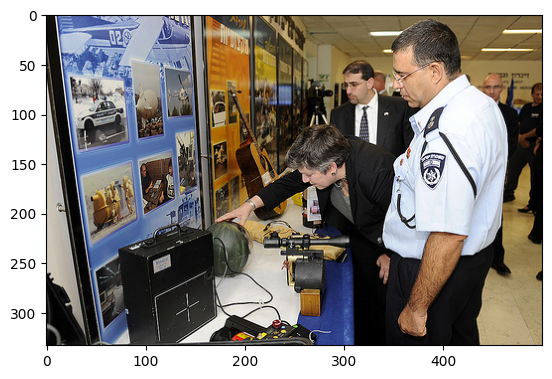

In [2]:
import matplotlib.pyplot as plt
import base64
import requests
from PIL import Image
from io import BytesIO

question = "What is the name of the watercraft to the left of the individual who is sporting a timepiece?"
image_path = "/cpfs/user/honglingyi/DATA/LLM/Vstar/gqa/images/2390431.jpg"
image = Image.open(image_path).convert("RGB")
plt.imshow(image)

In [56]:
image.height, image.width

(333, 500)

In [59]:
import numpy as np

def get_bbox_2d(action_list):
    if not action_list:
        return None

    for action in action_list:
        if not action:
            continue
        try:
            bbox_info = eval(action)
            if isinstance(bbox_info, list):
                bbox_2d = bbox_info[0]['bbox_2d']
            else:
                bbox_2d = bbox_info['bbox_2d']
            assert isinstance(bbox_2d, list), f"[ERROR] invalid bbox_2d type: {bbox_2d=}"
            assert len(bbox_2d) == 4, f"[ERROR] invalid size for {bbox_2d=}"
            bbox_result = maybe_resize_bbox(*bbox_2d)
            if not bbox_result:
                continue
            return bbox_result
        except Exception as err:
            print(f' [ERROR] unexpected {err=}')
            continue
    return None


def validate_bbox(left, top, right, bottom):
    try:
        assert left < right and bottom > top, f'invalid shape for {left=}, {top=}, {right=}, {bottom=}'
        height = bottom - top
        width = right - left
        assert max(height, width) / min(height, width) <= 100, f"aspect ratio error: {left=}, {top=}, {right=}, {bottom=}"
        return True
    except Exception as err:
        print(f' [ERROR vl_agent #2] {err=}')
        return False


def maybe_resize_bbox(left, top, right, bottom):
    left = max(0, left)
    top = max(0, top)
    right = min(375, right)
    bottom = min(500, bottom)
    if not validate_bbox(left, top, right, bottom):
        print(f' [!!!!!!] {left=}, {top=}, {right=}, {bottom=}')
        return None

    height = bottom - top
    width = right - left
    if height < 28 or width < 28:
        center_x = (left + right) / 2.0
        center_y = (top + bottom) / 2.0
        ratio = 28 / min(height, width)
        new_half_height = ceil(height * ratio * 0.5)
        new_half_width = ceil(width * ratio * 0.5)
        new_left = floor(center_x - new_half_width)
        new_right = ceil(center_x + new_half_width)
        new_top = floor(center_y - new_half_height)
        new_bottom = ceil(center_y + new_half_height)
        if not validate_bbox(new_left, new_top, new_right, new_bottom):
            print(f' [!!!!!!] {new_left=}, {new_top=}, {new_right=}, {new_bottom=}')
            return None
        return [new_left, new_top, new_right, new_bottom]
    return [left, top, right, bottom]

In [60]:
import re
action_list = ['[\n    {"bbox_2d": [54, 410, 82, 467], "label": "black bag"}\n]']
# pattern = re.compile(r'```json\s*([\s\S]*?)```', re.DOTALL)
# action_list = pattern.findall(action_string)
# action_list = [action.strip() for action in action_list]

a = get_bbox_2d(action_list)
a

[54, 410, 82, 467]

In [34]:
a = []
if not a:
    print('ss')

ss


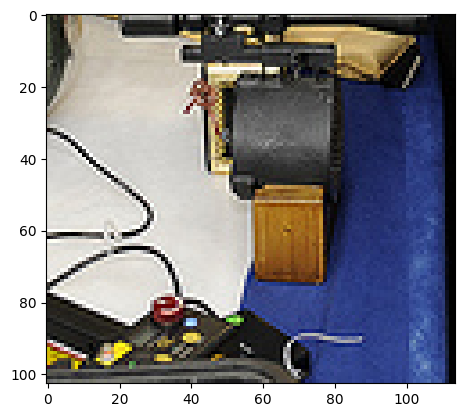

In [4]:
bbox = [199, 229, 313, 332]
# bbox = maybe_resize_bbox(bbox)
cropped_image = image.crop(bbox)
plt.imshow(cropped_image)

In [1]:
import json
with open('data/vlagent/distilled/GQA_1t_fail.json', 'r') as f:
    data = [json.loads(line) for line in f.readlines()]
len(data)

24847

In [2]:
succ_num = 0
for d in data:
    succ_num += d['result']
succ_num / len(data)

0.8421539823721174

In [3]:
succ_num

20925

In [ ]:
json_str = df.to_dict(orient='records')
print(json_str)

In [ ]:
json_str[711]['extra_info']['dataset']

In [ ]:
len(json_str)

In [ ]:
in_out = json.loads(json_str[711]['reward_model']['ground_truth'])
if 'functional' in in_out:
    inputs = in_out['functional']
inputs, outputs = in_out['inputs'], in_out['outputs']

In [ ]:
json_str[711]

In [ ]:
idx = 0
for j in json_str:
    if 'functional' in j['reward_model']['ground_truth']:
        idx += 1
idx

In [ ]:
json.loads(json_str[711]['reward_model']['ground_truth'])

In [ ]:
print(df['prompt'][711][1]['content'])

In [ ]:
print(df['extra_info'][711]['reference'])

In [14]:
import sys
def minimize_stdio(inputs, outputs, max_n_tests=8):
    stdin_list = []
    stdout_list = []
    for stdin, stdout in zip(inputs, outputs):
        if isinstance(stdin, list):
            stdin = "\n".join(stdin)
        if isinstance(stdout, list):
            stdout = "\n".join(stdout)
        if sys.getsizeof(stdin) > 4 * 1024:
            continue
        stdout.replace("\r\n", "\n")
        stdin_list.append(stdin)
        stdout_list.append(stdout)

    zipped = sorted(zip(stdin_list, stdout_list), key=lambda x: sys.getsizeof(x[0]))

    if not zipped:
        print("No tests found!")
        return [], []

    sorted_stdin, sorted_stdout = zip(*zipped)
    
    return [{'input': {'stdin': inp}, 'output': {'stdout': oup}} for inp, oup in zip(list(sorted_stdin[:max_n_tests]), list(sorted_stdout[:max_n_tests]))]

In [18]:
import json
# in_out = json.loads(df['reward_model'][711]['ground_truth'])
# inputs, outputs = in_out['inputs'], in_out['outputs']

in_out = json.loads(json_str[711]['reward_model']['ground_truth'])
inputs, outputs = in_out['inputs'], in_out['outputs']

unitests = minimize_stdio(inputs, outputs)

In [ ]:
unitests

In [23]:
unitests.append({'input': {'stdin': '1'}, 'output': {'stdout': '1'}})

In [24]:
from verl.workers.agent.envs.collab_code.sandbox_verify import OJConfig, oj_in_sandbox, OJRequest

code_str = df['extra_info'][711]['reference']
# tests = ground_truth
oj_data = {
    "id": 1,                          # Unique identifier
    "content": '',                     # Problem statement
    "test": unitests
}

result = oj_in_sandbox(OJRequest(
    completion=f"```python\n{code_str}\n```",
    config=OJConfig(language='python', provided_data=oj_data, extra={'run_all_cases': True}, run_timeout=5)),
                    connection_timeout=5)

In [ ]:
result.accepted

In [ ]:
s = """
{
    "Core Instruction": Search for information about the two standard ways to represent a graph in computer science.",
    "Supplementary Instructions": [
        "The representation methods should specifically include adjacency list representation.",
        "The representation methods should also include adjacency matrix representation.",
        "The information should define a graph G = (V, E) where V is a set of vertices and E is a set of edges."
    ]
}
"""

json.loads(s)

In [ ]:
import re

def try_extract_solution(solution_str):
    answer_pattern = r'<answer>(.*?)</answer>'
    matches = list(re.finditer(answer_pattern, solution_str, re.DOTALL))

    if matches:
        final_answer = matches[-1].group(1).strip()
        return final_answer

    return solution_str

CODE_PATTERN = re.compile(r'```(?:\w+)?\n(.*?)\n```', re.DOTALL)

def extract_code_from_string(solution_str):
    solution_str = try_extract_solution(solution_str)
    code_blocks = CODE_PATTERN.findall(solution_str)
    return '\n'.join(code_blocks).strip()

In [ ]:
solution_str = """
Some explanation.

<answer>
This is just a plain answer without any code block.
</answer>
"""

extract_code_from_string(solution_str)